In [1]:
#this allows us to read in the data and work with dataframes and work with arrays, 
import pandas as pd
import numpy as np
import seaborn as sns

#import our plotting libraries
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')

In [2]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('Data/Data_Machine_Learning/Kaggle_Honey_Pesticide.csv')
data = data.dropna(axis='columns', how='all')
# Drop the null rows
data = data.dropna()
data.columns


Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year', 'StateName', 'Region', 'nCLOTHIANIDIN',
       'nIMIDACLOPRID', 'nTHIAMETHOXAM', 'nACETAMIPRID', 'nTHIACLOPRID',
       'nAllNeonic'],
      dtype='object')

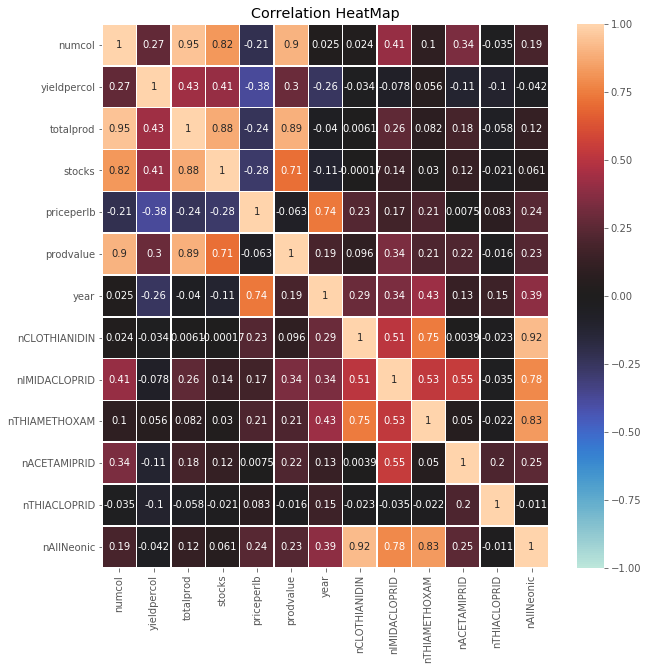

In [3]:
#creating pairwise correlation of columns using Pearson's R to make sure that we don't have Multicollinearity
corr = data.corr(method='pearson') 

#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')
plt.show()

In [4]:
# There are some Multicollinearity issues in the variables chosen - 0.9 value
# The value of 1’s on the diagonal axis are self-correlation
# There is a case to remove this variable, but we will keep it in the model for now
# We can decide the final y variable and do fine tuning for modeling

In [5]:
# Assign the data to X and y

X = data[["nCLOTHIANIDIN", 
          "nIMIDACLOPRID", 
          "nTHIAMETHOXAM", 
          "nACETAMIPRID", 
          "nTHIACLOPRID",
          "nAllNeonic",
          "numcol",
          #"totalprod",
          #"stocks",
          #"priceperlb",
          #"yieldpercol",
          #"prodvalue"
         ]]
y = data["totalprod"].values.reshape(-1, 1)
print(X.shape, y.shape)

(761, 7) (761, 1)


In [6]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [7]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [8]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9433464070389616
Testing Score: 0.9101686132983026


In [9]:
#outputs the coefficients
print('Intercept :', model.intercept_[0], '\n')
print(pd.DataFrame({'features':X_train.columns,'coeficients':model.coef_[0]}))

Intercept : -63957.75277324114 

        features  coeficients
0  nCLOTHIANIDIN    73.070774
1  nIMIDACLOPRID     5.308037
2  nTHIAMETHOXAM    82.433373
3   nACETAMIPRID  -275.830576
4   nTHIACLOPRID    49.851314
5     nAllNeonic   -65.167078
6         numcol    80.010905


Text(0.5, 1.0, 'Residual Plot')

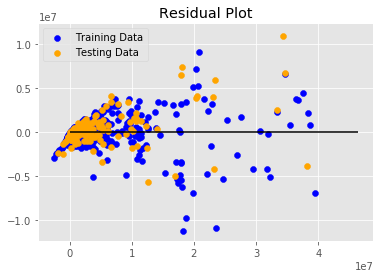

In [10]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [11]:
#stats model library allows us to run OLS directly,
import statsmodels.api as sm 

#re-run OLS model as sm_model using training and testing dataset,
X_train_sm = sm.add_constant(X_train)
sm_train_model = sm.OLS(y_train, X_train_sm).fit()
print('Training set adj r2: {}'.format(sm_train_model.rsquared_adj))

Training set adj r2: 0.9427426387303182


In [12]:
#for calculating MSE
from sklearn.metrics import mean_squared_error

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print("Root Mean Squared Error of Training Set: {}".format(rmse_train))
print("Root Mean Squared Error of Testing Set: {}".format(rmse_test))

Root Mean Squared Error of Training Set: 1724613.6024858814
Root Mean Squared Error of Testing Set: 1804025.4292504378


In [13]:
import joblib
filename = 'kaggle_model.sav'
joblib.dump(model, filename)

['kaggle_model.sav']

In [14]:
#model2 = jobkib.load('kaggle_model.sav')